# Testing plotnine on Chapter 4 of Healy's Data Visualization
[link](https://socviz.co/groupfacettx.html#groupfacettx) to chapter

In [1]:
import pandas as pd
from gapminder import gapminder
from plotnine import *
import plotnine

%matplotlib inline

In [27]:
def dollar(x): return ['${:,.0f}'.format(y) for y in x]
LOG_MINOR_BREAKS = [300,1000,3000,10000,30000,100000]
GGBLUE='#3d68f6'

## Facets

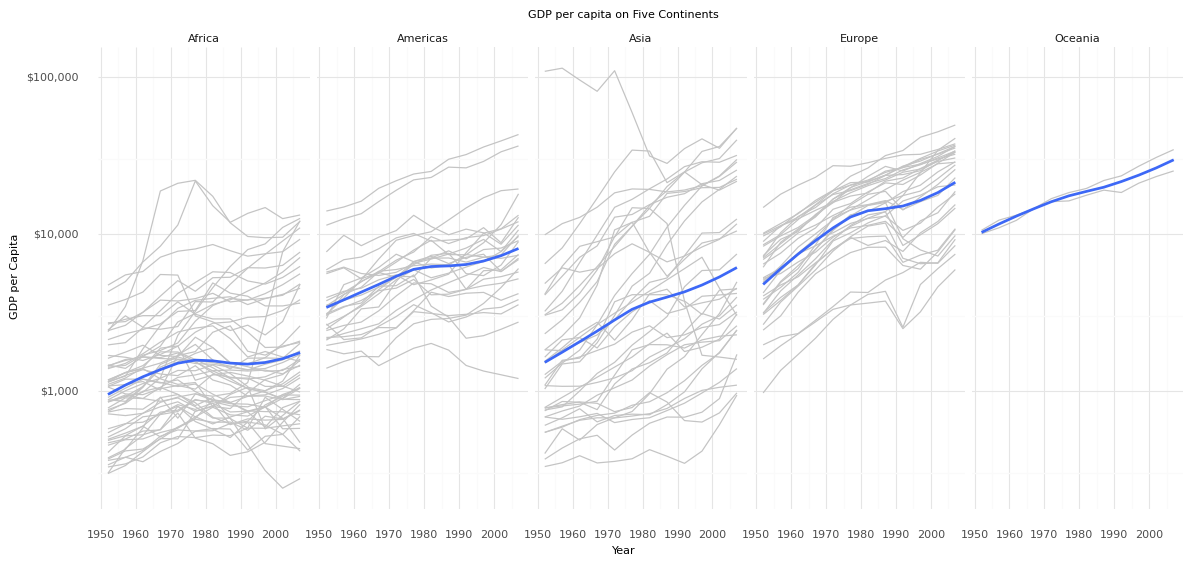

<ggplot: (320713903)>

In [40]:
# 4.4
plotnine.options.figure_size = (14, 6)

p = ggplot(
    data=gapminder,
    mapping=aes(x='year',y='gdpPercap')
)

p + geom_line(aes(group='country'),color='#c4c4c4') + \
    geom_smooth(size=1.1, method='loess',se=False,color=GGBLUE) + \
    facet_wrap('~ continent',ncol=5) + \
    scale_y_log10(labels=dollar,minor_breaks=LOG_MINOR_BREAKS) + \
    labs(x='Year', y='GDP per Capita',title="GDP per capita on Five Continents") + \
    theme_minimal() + theme(text=element_text(size=8))

/Users/jgiesler/miniconda3/envs/healy/lib/python3.8/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 18 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


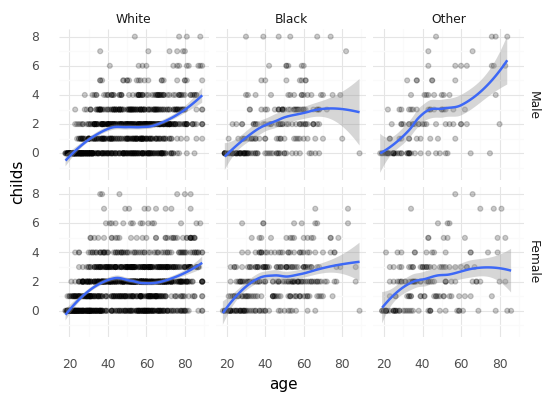

<ggplot: (319164832)>

In [109]:
# 4.5

plotnine.options.figure_size = (6, 4)

# NOTE(jkg): I exported this dataset from the socviz package in R

gss_sm = pd.read_feather('data/gss_sm.f')

p = ggplot(
    data=gss_sm,
    mapping=aes(x='age',y='childs')
)

p + geom_point(alpha=0.2) + \
    geom_smooth(method='loess',color=GGBLUE) + \
    facet_grid('sex~race') + theme_minimal()

## Transforming Data + Frequency Plots

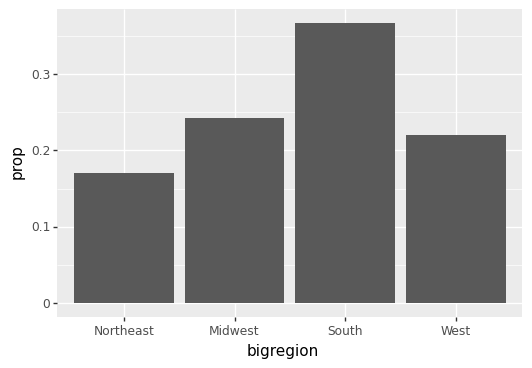

<ggplot: (320387687)>

In [110]:
# 4.8

p = ggplot(
    data=gss_sm,
    mapping=aes(x='bigregion')
)

p+geom_bar(mapping=aes(y='..prop..'),group=1)

In [132]:
gss_sm['religion'] = gss_sm['religion'].cat.add_categories(['NA'])
gss_sm['religion'] = gss_sm['religion'].fillna('NA')

In [142]:
# 4.9

GGRED   = '#e87e72'
GGGREENISH = '#a4a433' 
GGGREEN = '#55bb82'
GGTEAL = '#4caef0'
GGLIGHTPURPLE = '#d775ec'
GGGRAY = '#7f7f7f'

p = ggplot(
    data=gss_sm,
    mapping=aes(x='religion',color='religion')
)
p1 = p + geom_bar() + theme_minimal() + scale_color_manual(
        [GGRED,GGGREENISH,GGGREEN,GGTEAL,GGLIGHTPURPLE,GGGRAY]
    )

p = ggplot(
    data=gss_sm,
    mapping=aes(x='religion',fill="religion")
)

p2 = p + geom_bar() + guides(fill=False) + theme_minimal() + scale_fill_manual(
        [GGRED,GGGREENISH,GGGREEN,GGTEAL,GGLIGHTPURPLE,GGGRAY]
    )

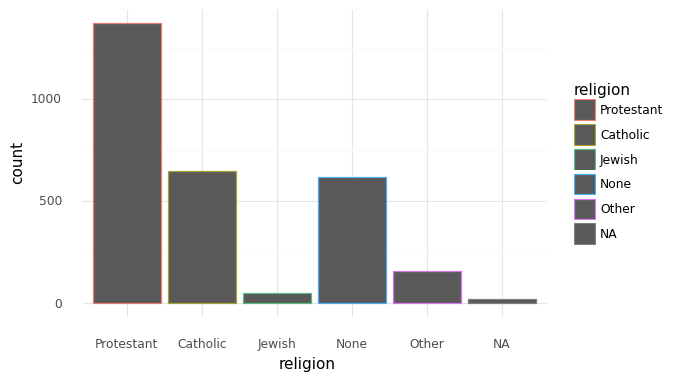

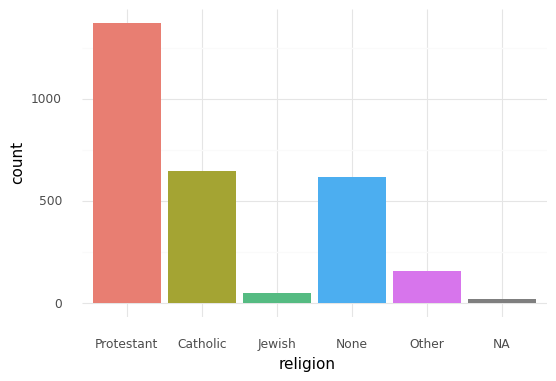

(<ggplot: (340640392)>, <ggplot: (340487226)>)

In [143]:
p1,p2

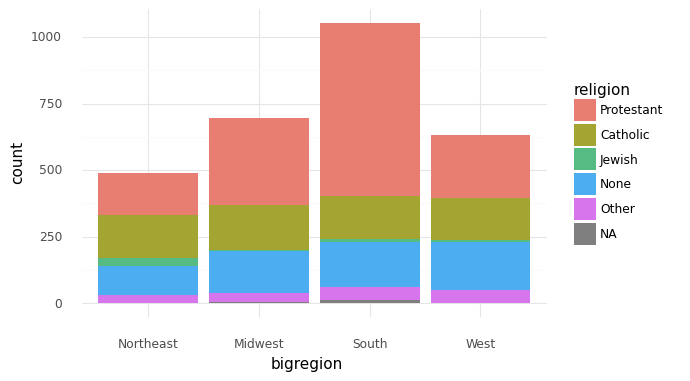

<ggplot: (321362137)>

In [144]:
# 4.10

p = ggplot(
    data=gss_sm,
    mapping=aes(x='bigregion',fill='religion')
)
p + geom_bar() + \
    theme_minimal() + \
    scale_fill_manual(
        [GGRED,GGGREENISH,GGGREEN,GGTEAL,GGLIGHTPURPLE,GGGRAY]
    )

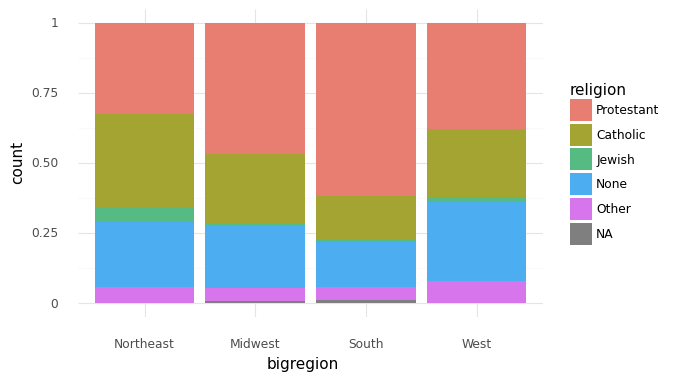

<ggplot: (340600019)>

In [145]:
# 4.11

p + geom_bar(position="fill") + \
    theme_minimal() + \
    scale_fill_manual(
        [GGRED,GGGREENISH,GGGREEN,GGTEAL,GGLIGHTPURPLE,GGGRAY]
    )

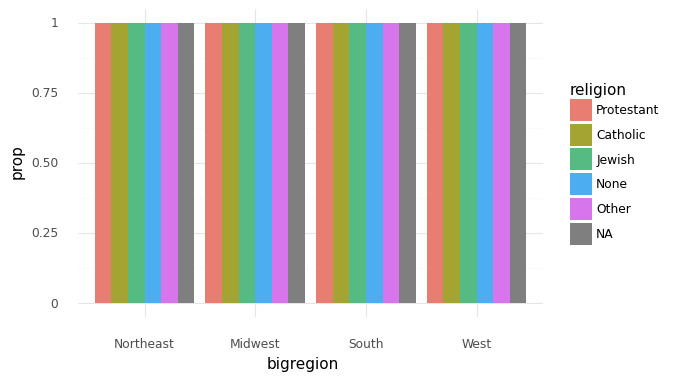

<ggplot: (340494508)>

In [146]:
# 4.12

p + geom_bar(position="dodge",mapping=aes(y='..prop..')) + \
    theme_minimal() + \
    scale_fill_manual(
        [GGRED,GGGREENISH,GGGREEN,GGTEAL,GGLIGHTPURPLE,GGGRAY]
    )

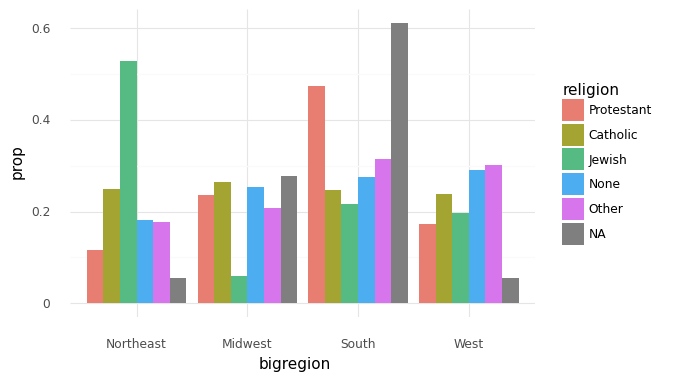

<ggplot: (319153878)>

In [147]:
# 4.13

p + geom_bar(position="dodge",mapping=aes(y='..prop..',group='religion')) + \
    theme_minimal() + \
    scale_fill_manual(
        [GGRED,GGGREENISH,GGGREEN,GGTEAL,GGLIGHTPURPLE,GGGRAY]
    )

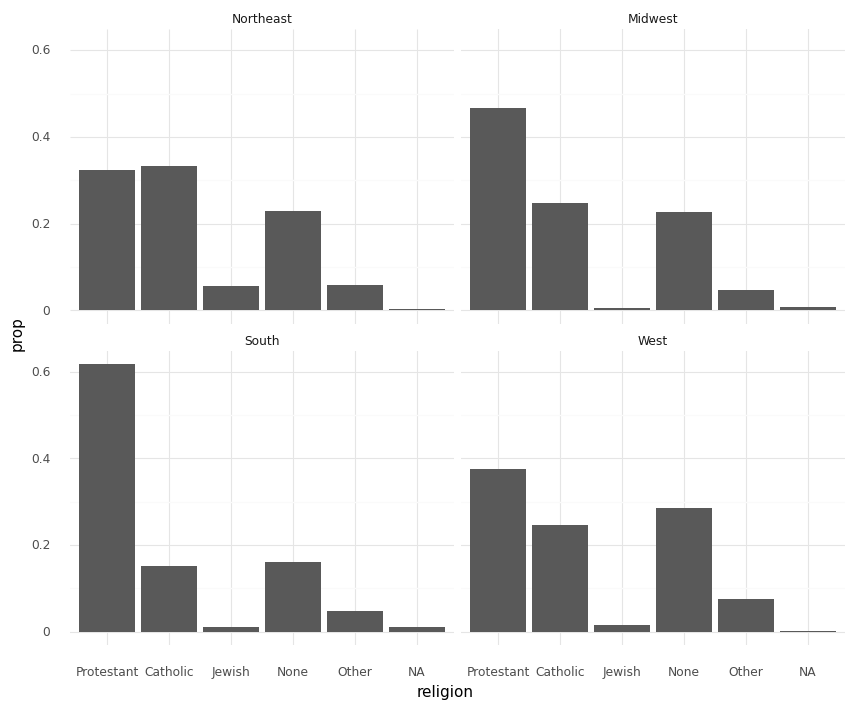

<ggplot: (321260707)>

In [157]:
# 4.14

plotnine.options.figure_size = (10, 8)

p = ggplot(
    data = gss_sm,
    mapping=aes(x='religion')
)

p + geom_bar(
    position='dodge',
    mapping=aes(y='..prop..',group='bigregion')
) + facet_wrap('~bigregion',ncol=2) + theme_minimal()

## Histograms + Density